In [5]:
import numpy as np
import skfuzzy as fuzz

In [6]:
from skfuzzy import control as ctrl

In [7]:
venda = ctrl.Antecedent(np.arange(0, 1.01, .01), 'venda')
preco = ctrl.Antecedent(np.arange(100000, 1001000, 1000), 'preco')

In [8]:
qualidade = ctrl.Consequent(np.arange(0, 100.1, .1), 'qualidade')

In [9]:
venda['baixa'] = fuzz.trimf(venda.universe, [0, 0.25, 0.5])
venda['media'] = fuzz.trimf(venda.universe, [0.3,0.5,0.7])
venda['alta'] = fuzz.trimf(venda.universe, [0.6,0.8,1])

In [10]:
preco['baixo'] = fuzz.trimf(preco.universe, [100000, 200000,300000])
preco['medio'] = fuzz.trimf(preco.universe, [250000, 500000, 700000])
preco['alto'] = fuzz.trimf(preco.universe, [600000, 800000, 1000000])

In [11]:
qualidade['ruim'] = fuzz.trapmf(qualidade.universe, [0, 25, 45,60])
qualidade['mediana'] = fuzz.trapmf(qualidade.universe, [40, 50, 70,80])
qualidade['boa'] = fuzz.trapmf(qualidade.universe, [75, 80,95,100])

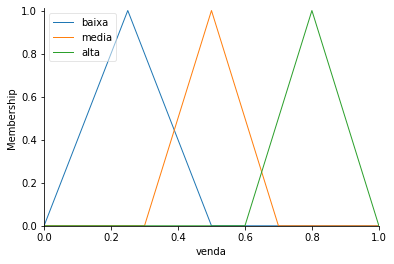

In [12]:
venda.view()

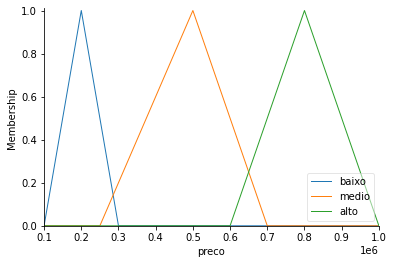

In [13]:
preco.view()

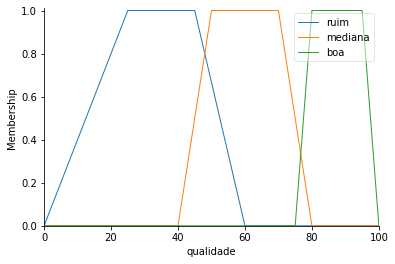

In [14]:
qualidade.view()

In [15]:
regra1 = ctrl.Rule(venda['baixa'], qualidade['ruim'])

In [16]:
regra2 = ctrl.Rule(venda['media'] | preco['medio'], qualidade['mediana'])

In [17]:
regra3 = ctrl.Rule(venda['alta'] & preco['alto'], qualidade['boa'])

In [18]:
regra4 = ctrl.Rule(venda['media'] | preco['baixo'], qualidade['mediana'])

In [19]:
regra5 = ctrl.Rule(venda['baixa'] & preco['alto'], qualidade['mediana'])

In [20]:
imovel_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5])
engine = ctrl.ControlSystemSimulation(imovel_ctrl)

In [24]:
engine.input['venda'] = 0.78
engine.input['preco'] = 680000

In [25]:
engine.compute()

79.37771203155866


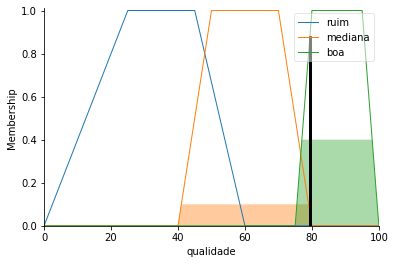

In [26]:
print(engine.output['qualidade'])
qualidade.view(sim=engine)